In [3]:
#cd "/Users/peterpaz/Dropbox/0_Forecasting"

In [4]:
#conda env create -f tsa_course_env.yml

In [165]:
import numpy as np
import pandas as pd
%matplotlib inline

# 1. Transformation and adjustments

In [26]:
#cd '/Users/peterpaz/Dropbox/0_Forecasting/2_FPP/03_TSDecomposition/'

##  Population adjustment

In [27]:
df = pd.read_csv('../data/global_economy.csv',index_col='Year',parse_dates=True)

In [28]:
df.head()

,Country,Code,GDP,Growth,CPI,Imports,Exports,Population
Year,,,,,,,,
1960-01-01,Afghanistan,AFG,5.377778e+08,NaN,NaN,7.024793,4.132233,8996351.0
1961-01-01,Afghanistan,AFG,5.488889e+08,NaN,NaN,8.097166,4.453443,9166764.0
1962-01-01,Afghanistan,AFG,5.466667e+08,NaN,NaN,9.349593,4.878051,9345868.0
1963-01-01,Afghanistan,AFG,7.511112e+08,NaN,NaN,16.863910,9.171601,9533954.0
1964-01-01,Afghanistan,AFG,8.000000e+08,NaN,NaN,18.055555,8.888893,9731361.0


In [29]:
df['GDP per capita']=df['GDP']/df['Population']
df.head()

,Country,Code,GDP,Growth,CPI,Imports,Exports,Population,GDP per capita
Year,,,,,,,,,
1960-01-01,Afghanistan,AFG,5.377778e+08,NaN,NaN,7.024793,4.132233,8996351.0,59.777327
1961-01-01,Afghanistan,AFG,5.488889e+08,NaN,NaN,8.097166,4.453443,9166764.0,59.878153
1962-01-01,Afghanistan,AFG,5.466667e+08,NaN,NaN,9.349593,4.878051,9345868.0,58.492874
1963-01-01,Afghanistan,AFG,7.511112e+08,NaN,NaN,16.863910,9.171601,9533954.0,78.782758
1964-01-01,Afghanistan,AFG,8.000000e+08,NaN,NaN,18.055555,8.888893,9731361.0,82.208444


In [44]:
df=df[df['Country'] == 'Australia']
df.head()

,Country,Code,GDP,Growth,CPI,Imports,Exports,Population,GDP per capita
Year,,,,,,,,,
1960-01-01,Australia,AUS,1.857319e+10,NaN,7.960458,14.061746,12.994452,10276477.0,1807.349784
1961-01-01,Australia,AUS,1.964834e+10,2.485605,8.142560,15.025080,12.403101,10483000.0,1874.304768
1962-01-01,Australia,AUS,1.988801e+10,1.296478,8.116545,12.630927,13.943012,10742000.0,1851.424816
1963-01-01,Australia,AUS,2.150185e+10,6.214278,8.168574,13.834054,13.005886,10950000.0,1963.639079
1964-01-01,Australia,AUS,2.375854e+10,6.978724,8.402706,13.764495,14.938248,11167000.0,2127.566902


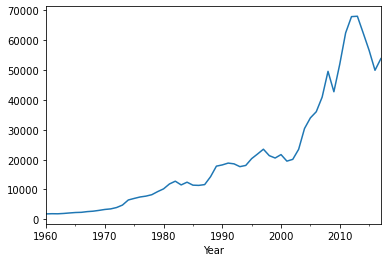

In [47]:
df['GDP per capita'].plot();
# or df['GDP per capita'].plot.line();

##  Inflation adjustment

In [58]:
df = pd.read_csv('../data/aus_retail.csv',index_col='Month',parse_dates=True)

In [59]:
df.head()

,State,Industry,Series ID,Turnover
Month,,,,
1982-04-01,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,4.4
1982-05-01,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,3.4
1982-06-01,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,3.6
1982-07-01,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,4.0
1982-08-01,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,3.6


In [67]:
#pip install dplython

In [68]:
#pip install git+https://github.com/dodger487/dplython.git


In [53]:
df=df[df['Industry'] == 'Newspaper and book retailing']
df.head()

,State,Industry,Series ID,Turnover
Month,,,,
1982-04-01,Australian Capital Territory,Newspaper and book retailing,A3349773T,2.3
1982-05-01,Australian Capital Territory,Newspaper and book retailing,A3349773T,2.5
1982-06-01,Australian Capital Territory,Newspaper and book retailing,A3349773T,2.3
1982-07-01,Australian Capital Territory,Newspaper and book retailing,A3349773T,2.6
1982-08-01,Australian Capital Territory,Newspaper and book retailing,A3349773T,2.6


In [54]:
df.index

DatetimeIndex(['1982-04-01', '1982-05-01', '1982-06-01', '1982-07-01',
               '1982-08-01', '1982-09-01', '1982-10-01', '1982-11-01',
               '1982-12-01', '1983-01-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='Month', length=3456, freq=None)

In [57]:
df.resample(rule='A').sum();

In [ ]:
#df.groupby('Industry')['var1'].agg({'Turnover' : np.sum()})

##  Box Cox transformation

In [73]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer: Union[str, pathlib.Path, IO[~AnyStr]], sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: str = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read a comma-separated values (csv) file in

/Users/peterpaz/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [83]:
df = pd.read_csv('../data/aus_production.csv',index_col='Quarter',parse_dates=True)
df.head()

/Users/peterpaz/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Beer,Tobacco,Bricks,Cement,Electricity,Gas
Quarter,,,,,,
1956 Q1,284,5225.0,189.0,465,3923,5
1956 Q2,213,5178.0,204.0,532,4436,6
1956 Q3,227,5297.0,208.0,561,4806,7
1956 Q4,308,5681.0,197.0,570,4418,6
1957 Q1,262,5577.0,187.0,529,4339,5


In [84]:
from scipy.stats import boxcox
df['Gas'], lam = boxcox(df['Gas'])


/Users/peterpaz/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [85]:
lam

/Users/peterpaz/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.4374315279941498

<AxesSubplot:xlabel='Quarter'>

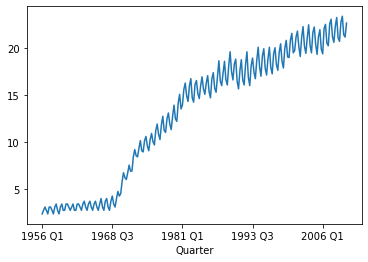

In [86]:
df['Gas'].plot()

In [87]:
df.head()

/Users/peterpaz/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Beer,Tobacco,Bricks,Cement,Electricity,Gas
Quarter,,,,,,
1956 Q1,284,5225.0,189.0,465,3923,2.336050
1956 Q2,213,5178.0,204.0,532,4436,2.719778
1956 Q3,227,5297.0,208.0,561,4806,3.068965
1956 Q4,308,5681.0,197.0,570,4418,2.719778
1957 Q1,262,5577.0,187.0,529,4339,2.336050


# 2. Time Series Components


In [179]:
df = pd.read_csv('../data/us_employment.csv',parse_dates=True)


In [180]:
df.head()

,Month,Series_ID,Title,Employed
0,1939 Jan,CEU0500000001,Total Private,25338.0
1,1939 Feb,CEU0500000001,Total Private,25447.0
2,1939 Mar,CEU0500000001,Total Private,25833.0
3,1939 Apr,CEU0500000001,Total Private,25801.0
4,1939 May,CEU0500000001,Total Private,26113.0


In [181]:
#from datetime import datetime

df['year'] = pd.DatetimeIndex(df['Month']).year



/Users/peterpaz/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [182]:
df.head()

,Month,Series_ID,Title,Employed,year
0,1939 Jan,CEU0500000001,Total Private,25338.0,1939
1,1939 Feb,CEU0500000001,Total Private,25447.0,1939
2,1939 Mar,CEU0500000001,Total Private,25833.0,1939
3,1939 Apr,CEU0500000001,Total Private,25801.0,1939
4,1939 May,CEU0500000001,Total Private,26113.0,1939


In [183]:
#df.set_index("Month")
df.set_index("Month", inplace=True) 

/Users/peterpaz/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [184]:
df.head()

,Series_ID,Title,Employed,year
Month,,,,
1939 Jan,CEU0500000001,Total Private,25338.0,1939
1939 Feb,CEU0500000001,Total Private,25447.0,1939
1939 Mar,CEU0500000001,Total Private,25833.0,1939
1939 Apr,CEU0500000001,Total Private,25801.0,1939
1939 May,CEU0500000001,Total Private,26113.0,1939


In [185]:
#df.reset_index()
#df.head()

/Users/peterpaz/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [186]:
df=df[(df['year']>=1990) &  (df['Title']=="Retail Trade") ]

In [187]:
df.head()

/Users/peterpaz/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Series_ID,Title,Employed,year
Month,,,,
1990 Jan,CEU4200000001,Retail Trade,13255.8,1990
1990 Feb,CEU4200000001,Retail Trade,12966.3,1990
1990 Mar,CEU4200000001,Retail Trade,12938.2,1990
1990 Apr,CEU4200000001,Retail Trade,13012.3,1990
1990 May,CEU4200000001,Retail Trade,13108.3,1990


In [188]:
df=df.drop('Series_ID', 1)

/Users/peterpaz/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


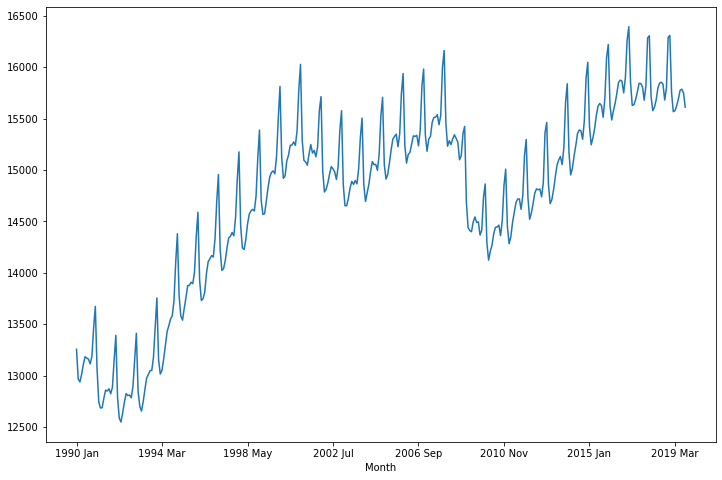

In [189]:
df['Employed'].plot(figsize=(12,8));

### STL decomposition method:

In [190]:
df.head()

/Users/peterpaz/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Title,Employed,year
Month,,,
1990 Jan,Retail Trade,13255.8,1990
1990 Feb,Retail Trade,12966.3,1990
1990 Mar,Retail Trade,12938.2,1990
1990 Apr,Retail Trade,13012.3,1990
1990 May,Retail Trade,13108.3,1990


In [198]:
df.index

Index(['1990 Jan', '1990 Feb', '1990 Mar', '1990 Apr', '1990 May', '1990 Jun',
       '1990 Jul', '1990 Aug', '1990 Sep', '1990 Oct',
       ...
       '2018 Dec', '2019 Jan', '2019 Feb', '2019 Mar', '2019 Apr', '2019 May',
       '2019 Jun', '2019 Jul', '2019 Aug', '2019 Sep'],
      dtype='object', name='Month', length=357)

In [199]:
idx = pd.date_range('1/1/1990', periods=357, freq='M')


In [200]:
idx

DatetimeIndex(['1990-01-31', '1990-02-28', '1990-03-31', '1990-04-30',
               '1990-05-31', '1990-06-30', '1990-07-31', '1990-08-31',
               '1990-09-30', '1990-10-31',
               ...
               '2018-12-31', '2019-01-31', '2019-02-28', '2019-03-31',
               '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31',
               '2019-08-31', '2019-09-30'],
              dtype='datetime64[ns]', length=357, freq='M')

In [210]:
df2=pd.DataFrame(df['Employed'].values,index=idx)
df2.columns = ['Employed']

In [211]:
df2.head()

,Employed
1990-01-31,13255.8
1990-02-28,12966.3
1990-03-31,12938.2
1990-04-30,13012.3
1990-05-31,13108.3


In [212]:
from statsmodels.tsa.seasonal import seasonal_decompose


/Users/peterpaz/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [213]:
df2.index

DatetimeIndex(['1990-01-31', '1990-02-28', '1990-03-31', '1990-04-30',
               '1990-05-31', '1990-06-30', '1990-07-31', '1990-08-31',
               '1990-09-30', '1990-10-31',
               ...
               '2018-12-31', '2019-01-31', '2019-02-28', '2019-03-31',
               '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31',
               '2019-08-31', '2019-09-30'],
              dtype='datetime64[ns]', length=357, freq='M')

In [193]:
#df.sort_index(inplace=True)
#df.index

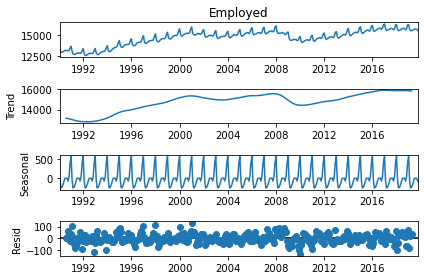

In [216]:
result = seasonal_decompose(df2['Employed'],model="additive" ) 
result.plot();

/Users/peterpaz/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

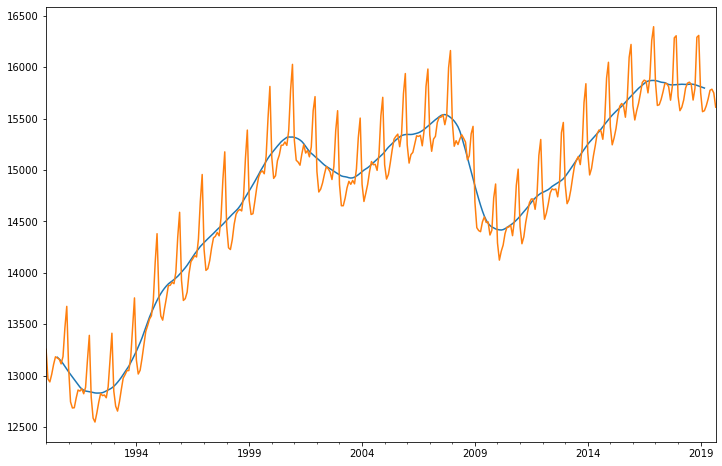

In [226]:
result.trend.plot(figsize=(12,8))
result.observed.plot()

In [230]:
seasonadjust=result.observed-result.seasonal
seasonadjust.head()

/Users/peterpaz/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1990-01-31    13331.261230
1990-02-28    13239.351173
1990-03-31    13191.395856
1990-04-30    13202.519599
1990-05-31    13197.223022
Freq: M, dtype: float64

/Users/peterpaz/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

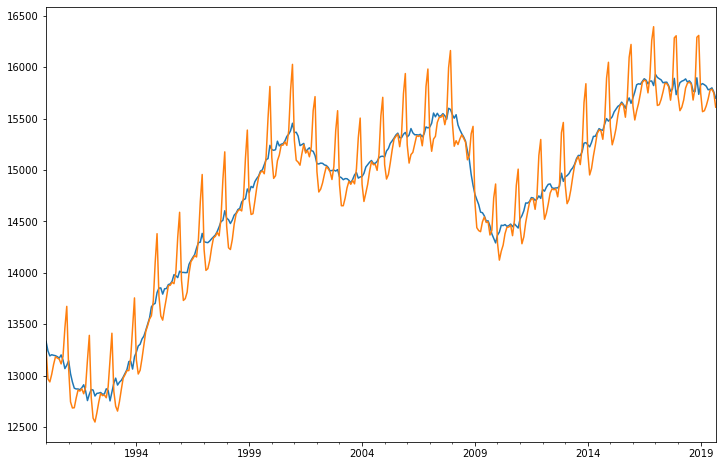

In [235]:

seasonadjust.plot()
result.observed.plot(figsize=(12,8))


## Time Series Components

In [236]:
df = pd.read_csv('../data/global_economy.csv',index_col='Year',parse_dates=True)

/Users/peterpaz/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [237]:
df.head()

,Country,Code,GDP,Growth,CPI,Imports,Exports,Population
Year,,,,,,,,
1960-01-01,Afghanistan,AFG,5.377778e+08,NaN,NaN,7.024793,4.132233,8996351.0
1961-01-01,Afghanistan,AFG,5.488889e+08,NaN,NaN,8.097166,4.453443,9166764.0
1962-01-01,Afghanistan,AFG,5.466667e+08,NaN,NaN,9.349593,4.878051,9345868.0
1963-01-01,Afghanistan,AFG,7.511112e+08,NaN,NaN,16.863910,9.171601,9533954.0
1964-01-01,Afghanistan,AFG,8.000000e+08,NaN,NaN,18.055555,8.888893,9731361.0


/Users/peterpaz/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:xlabel='Year'>

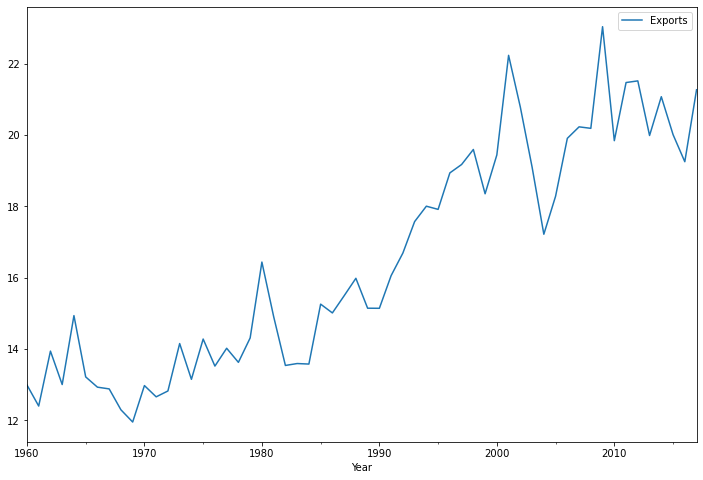

In [243]:
df['Exports'][df['Country'] == 'Australia'].plot(figsize=(12,8), legend=True)

## Moving average smoothing


In [258]:
df['SMA5_Ex']=df['Exports'][df['Country'] == 'Australia'].rolling(window=5).mean()

/Users/peterpaz/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [259]:
df['SMA5_Ex']

Year
1960-01-01          NaN
1961-01-01          NaN
1962-01-01          NaN
1963-01-01          NaN
1964-01-01    13.456940
                ...    
2013-01-01    21.172112
2014-01-01    20.779563
2015-01-01    20.813652
2016-01-01    20.369689
2017-01-01    20.319965
Name: SMA5_Ex, Length: 15150, dtype: float64

/Users/peterpaz/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:xlabel='Year'>

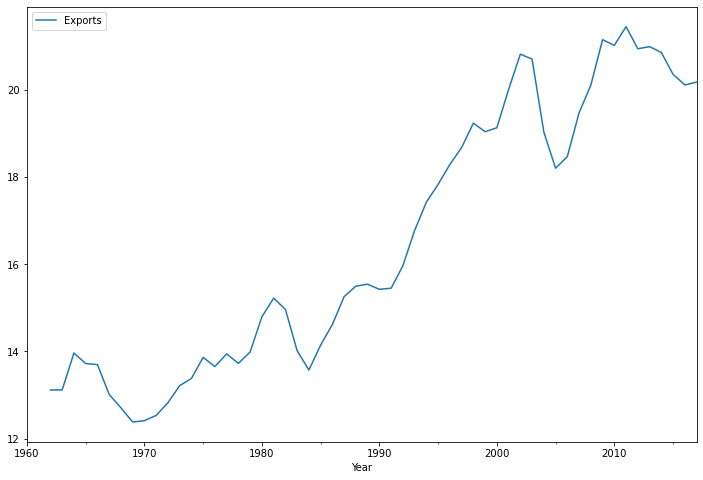

In [263]:
df['Exports'][df['Country'] == 'Australia'].rolling(window=3).mean().plot(figsize=(12,8), legend=True)

In [254]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

df['SES5']=SimpleExpSmoothing(df['Exports'][df['Country'] == 'Australia']).fit(smoothing_level=2/(5+1), optimized=False).fittedvalues.shift(-1)


/Users/peterpaz/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/peterpaz/opt/anaconda3/lib/python3.8/site-packages/patsy/constraint.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.9 it will stop working
  from collections import Mapping
/Users/peterpaz/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/Users/peterpaz/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: Future

/Users/peterpaz/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:xlabel='Year'>

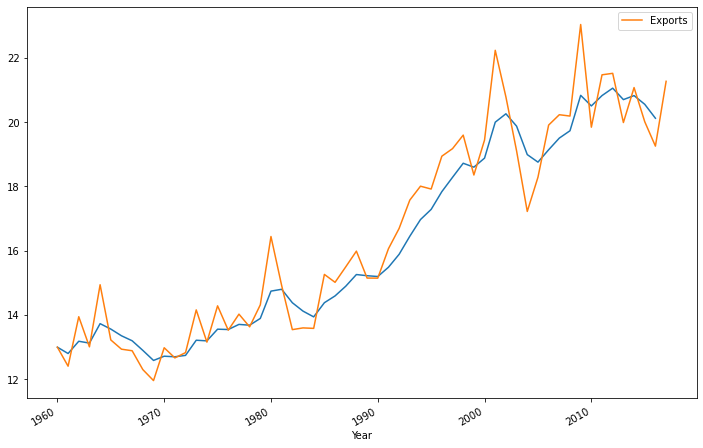

In [257]:
df['SES5'].plot()
df['Exports'][df['Country'] == 'Australia'].plot(figsize=(12,8), legend=True)

In [ ]:
dcmp<-


components(dcmp) %>% autoplot()